In [9]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential # sequential = data will flow from one layer to other
import matplotlib as plt
import  seaborn as sns

In [4]:
#Getting data
df=sns.load_dataset('mpg')

In [5]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [7]:
df['origin'].unique()

array(['usa', 'japan', 'europe'], dtype=object)

In [8]:
df.shape

(398, 9)

In [10]:
#Data Prepration
df.isna().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,6
weight,0
acceleration,0
model_year,0
origin,0
name,0


In [12]:
df['horsepower'].fillna(df['horsepower'].mean(), inplace=True)

In [13]:
df.isna().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model_year,0
origin,0
name,0


In [14]:
df=df.drop('name',axis=1)

In [15]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin'],
      dtype='object')

In [16]:
# OUTLIERS: Extreme values/ values which do not lie in max probability
print(df['horsepower'].skew())
print(df['displacement'].skew())
print(df['weight'].skew())
print(df['acceleration'].skew()) # if value>1 then outlier

1.0955524807071189
0.7196451643005952
0.5310625125994629
0.27877684462588986


In [22]:
for i in df.columns:
    if df[i].dtype == np.float64 or df[i].dtype == np.int64:
        print(i,": ",df[i].skew()) #horsepower has outlier skew() = if the value is between 1 and -1, we don't have any outliers

mpg :  0.45706634399491913
cylinders :  0.5269215453528939
displacement :  0.7196451643005952
horsepower :  1.0955524807071189
weight :  0.5310625125994629
acceleration :  0.27877684462588986
model_year :  0.01153459401509278


<Axes: ylabel='horsepower'>

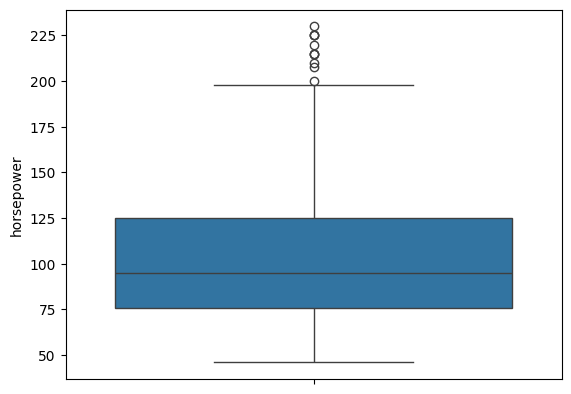

In [23]:
sns.boxplot(df['horsepower'])

In [24]:
#dummy encoding
df = pd.get_dummies(df, columns=['origin'], drop_first=True, prefix='origin', dtype=int)

In [25]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,70,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,0,1


In [26]:
#mpg is linear dataset. cylinders and model_year
#though have datatype of int. but they define the car category, so we need to perform one-hot encoding eg : 1970 category model, 2024 category model

In [27]:
df['cylinders'].unique()

array([8, 4, 6, 3, 5])

In [28]:
df['model_year'].unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82])

In [29]:
df = pd.get_dummies(df, columns=['cylinders'], drop_first=True, prefix='cylinder', dtype=int)
df = pd.get_dummies(df, columns=['model_year'], drop_first=True, prefix='year', dtype=int)

In [30]:
target = ['mpg']
predictors = list(set(list(df.columns))-set(target))

In [31]:
predictors

['year_74',
 'weight',
 'acceleration',
 'year_78',
 'year_76',
 'year_77',
 'year_82',
 'year_72',
 'year_75',
 'horsepower',
 'year_79',
 'origin_usa',
 'year_71',
 'year_73',
 'displacement',
 'year_80',
 'year_81',
 'origin_japan',
 'cylinder_5',
 'cylinder_6',
 'cylinder_4',
 'cylinder_8']

In [33]:
x=df[predictors].values
y=df[target].values

In [34]:
x

array([[0.000e+00, 3.504e+03, 1.200e+01, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [0.000e+00, 3.693e+03, 1.150e+01, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [0.000e+00, 3.436e+03, 1.100e+01, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       ...,
       [0.000e+00, 2.295e+03, 1.160e+01, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [0.000e+00, 2.625e+03, 1.860e+01, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [0.000e+00, 2.720e+03, 1.940e+01, ..., 0.000e+00, 1.000e+00,
        0.000e+00]])

In [36]:
type(y)

numpy.ndarray

In [37]:
# Divide Train and Test Datasets

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [45]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

In [53]:
#Build Neural Network
len(df.columns)

23

In [56]:
model=Sequential()
model.add(tf.keras.layers.Dense(32,input_shape=(22,),activation='relu'))#Dense(32) -> to create fully connected Neural Network every input layer will connect to every hidden layer no of i/p nodes=32
model.add(tf.keras.layers.Dense(1))#output layer->1
# input_shape() - every node takes 22 inputs or every total no of cols of dataframe will be input to each node


In [57]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 32)                  │             736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 769 (3.00 KB)

 Trainable params: 769 (3.00 KB)

 Non-trainable params: 0 (0.00 B)